In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001 or 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
# drop Relevant? == 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

# filter out parallel algorithms
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

approximation_algorithms.sort_values(by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms


,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Parallel?,Quantum?
152,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Aingworth, Chekuri, Indyk, Motwani",1999.0,5.50,99999.0,2.00,additive,no,NaN,0,0.0
153,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_2]",2000.0,5.33,99999.0,2.00,additive,no,NaN,0,0.0
154,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_k]",2000.0,5.01,99999.0,3.00,additive,yes,NaN,0,0.0
155,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_infty]",2000.0,5.01,4.0,99999.00,multiplicative,no,NaN,0,0.0
156,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Deng, Kirkpatrick, Rong, V. Williams, Zhong",2022.0,5.29,99999.0,2.00,additive,no,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...","Biswas, Raman, Saurabh",2020.0,NaN,3.0,99999.00,multiplicative,no,NaN,0,0.0
737,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...",Behnezhad [Theorem 1.3],2021.0,NaN,3.0,5.99,multiplicative-additive,yes,NaN,0,0.0
878,Wiener Index,1,1,Minimum Wiener Connector problem,NaN,2008.0,5.50,2.0,99999.00,multiplicative,yes,FPTAS,0,0.0
877,Wiener Index,1,1,Minimum Wiener Connector problem,Ruchansky,2015.0,5.01,4.0,99999.00,multiplicative,no,NaN,0,0.0


In [26]:
# read sheet1
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?'
]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']


# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

# drop if Famiy Name is not in approximation_algorithms
sheet1 = sheet1[sheet1['Family Name'].isin(approximation_algorithms['Family Name'])]

sheet1



,Family Name,Looked at?,Variation,Algorithm Name,Year,Time Complexity Class,Approximate?,Parallel?,Quantum?
2,Optimal Binary Search Trees,2.0,Alphabetic Tree Problem,Klawe; Mumey,1993.0,3.000,0,0,0.0
8,The Subset-Sum Problem,2.0,Subset Sum,Pisinger,2003.0,3.000,0,0,0.0
9,The Subset-Sum Problem,2.0,Subset Sum,Faaland,1973.0,3.000,0,0,0.0
10,The Subset-Sum Problem,2.0,Subset Sum,Pferschy,1999.0,3.000,0,0,0.0
11,The Subset-Sum Problem,2.0,Subset Sum,Klinz,1999.0,4.500,0,0,0.0
...,...,...,...,...,...,...,...,...,...
902,Link Analysis,1.0,Link Analysis,Richardson and Domingos,2002.0,6.000,0,0,0.0
903,Link Analysis,1.0,Link Analysis,Tomlin,2003.0,6.000,0,0,0.0
904,Link Analysis,1.0,Link Analysis,Achlioptas,2001.0,6.000,0,0,0.0
929,Determinant of Matrices with Integer Entries,2.0,Determinant of Matrices with Integer Entries,Bareiss algorithm,1968.0,5.520,0,0,0.0


In [37]:
def plot_family(family):
    df = pd.concat([approximation_algorithms, sheet1], axis=0)

    df = df[df['Family Name'] == family]

    # create column exact that is True if the algorithm have no Approximation Type
    df['Exact'] = df['Approximation Type (additive/multiplicative)'].isnull()

    # create a column Constant Factor that is True if the algorithm have Approximation Factor Class (Mult) <= 2 or Approximation Factor Class (Add) <= 4.5 or is exact
    df['Constant Factor'] = (df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | (df['Approximation Factor Class (Add)'].astype(float) <= 2) | df['Exact']
    # sort by year and time complexity
    df.sort_values(by=['Year', 'Time Complexity Class'], inplace=True)


    # plot Time Complexity Class vs Year
    exact = df[df['Exact']]
    constant_factor = df[df['Constant Factor']]
    approximate = df[df['Constant Factor'] == False]

    def fill_best(df, column="Time Complexity Class"):
        best = []
        last_best = 99999
        for index, row in df.iterrows():
            if row[column] < last_best:
                best.append(True)
                last_best = row[column]
            else:
                best.append(False)

        return best

    exact['Best'] = fill_best(exact)
    constant_factor['Best'] = fill_best(constant_factor)
    df['Best'] = fill_best(df)

    plt.figure(figsize=(10, 6))
    plt.scatter(approximate['Year'], approximate['Time Complexity Class'], label='Any error', color='orange')
    plt.scatter(constant_factor['Year'], constant_factor['Time Complexity Class'], label='Constant Factor', color='blue')
    plt.scatter(exact['Year'], exact['Time Complexity Class'], label='Exact', color='green')

    if len(approximate) > 0:
        best_approximate = df[df['Best']]
        last_row = best_approximate.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_approximate = pd.concat([best_approximate, last_row], ignore_index=True)
        plt.step(best_approximate['Year'], best_approximate['Time Complexity Class'], where='post', color='orange')

    if len(constant_factor) > 0:
        best_constant_factor = constant_factor[constant_factor['Best']]
        last_row = best_constant_factor.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_constant_factor = pd.concat([best_constant_factor, last_row], ignore_index=True)
        plt.step(best_constant_factor['Year'], best_constant_factor['Time Complexity Class'], where='post', color='blue')

    if len(exact) > 0:
        best_exact = exact[exact['Best']]
        last_row = best_exact.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_exact = pd.concat([best_exact, last_row], ignore_index=True)
        plt.step(best_exact['Year'], best_exact['Time Complexity Class'], where='post', color='green')


        


    plt.yticks(np.arange(1, 9, 1), ['Constant', 'Polylogarithmic', 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial (>3)', 'Superpolynomial'])


    plt.xlabel('Year')
    plt.ylabel('Time Complexity Class')
    plt.legend()
    plt.title(family)
    plt.show()



/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


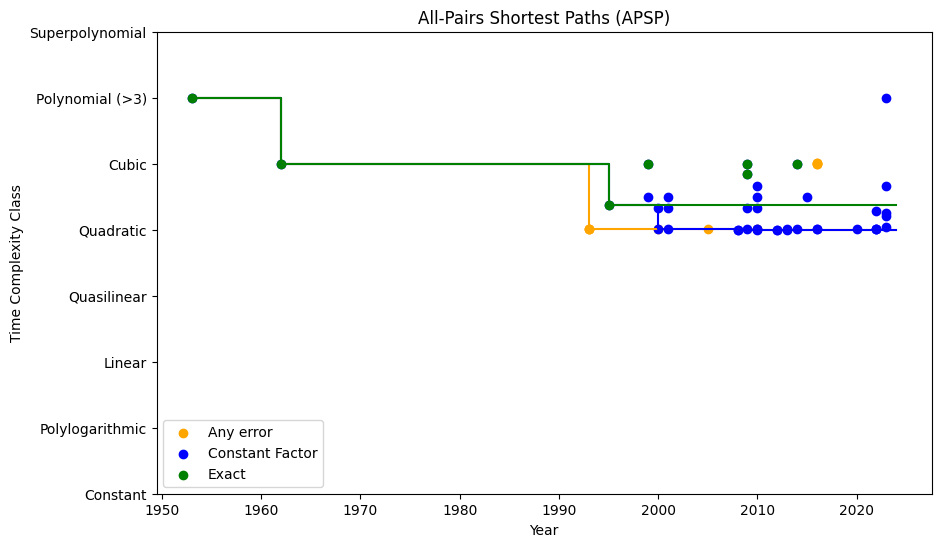

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


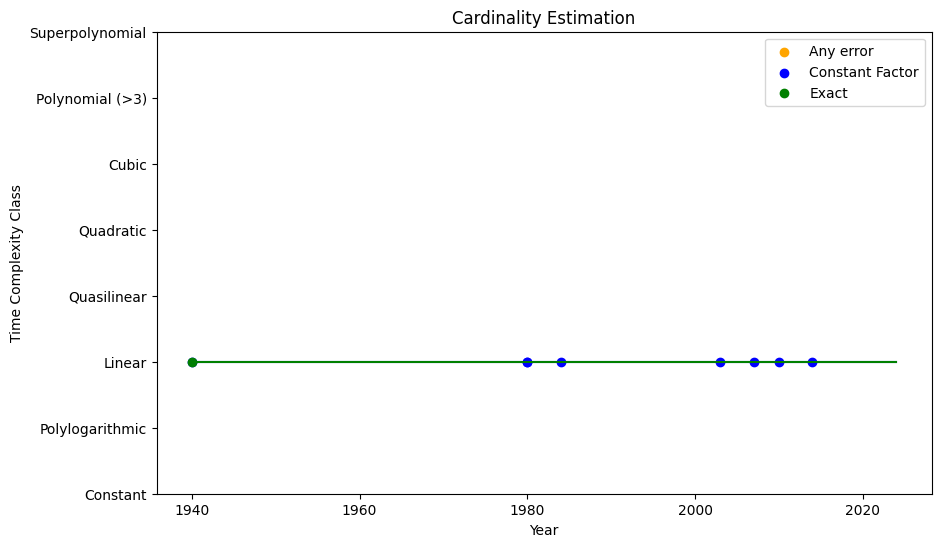

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


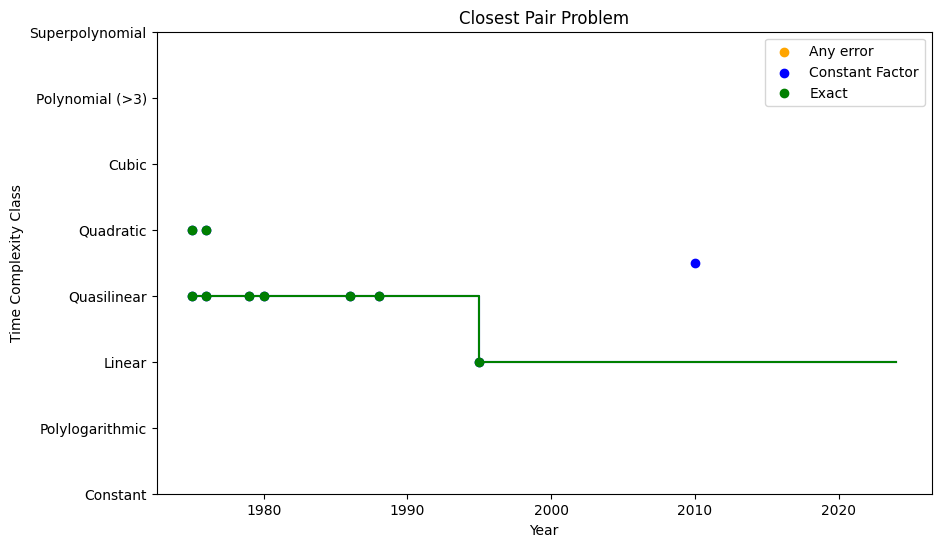

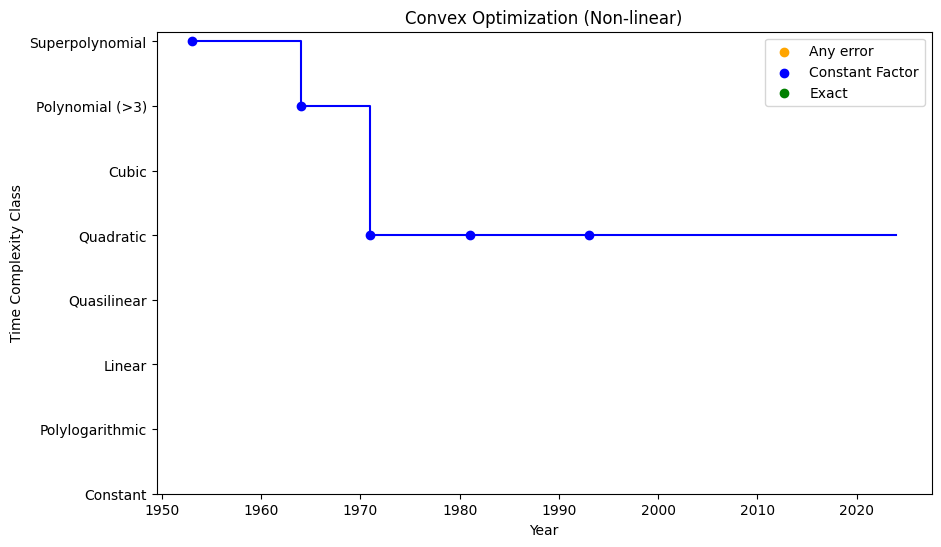

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


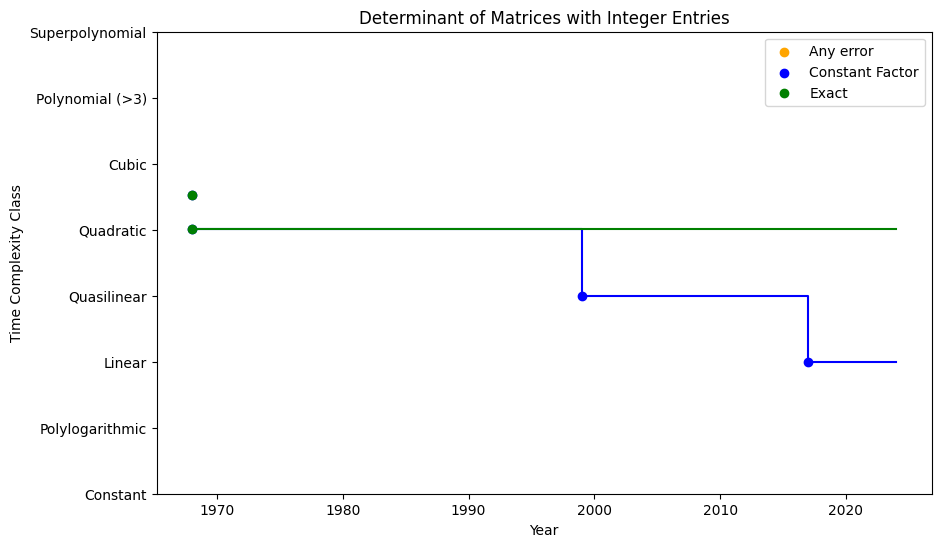

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


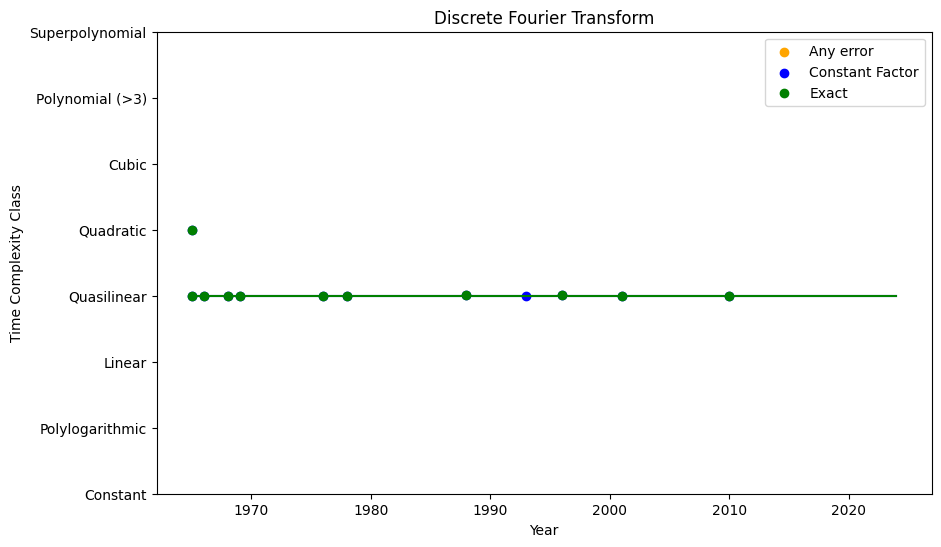

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


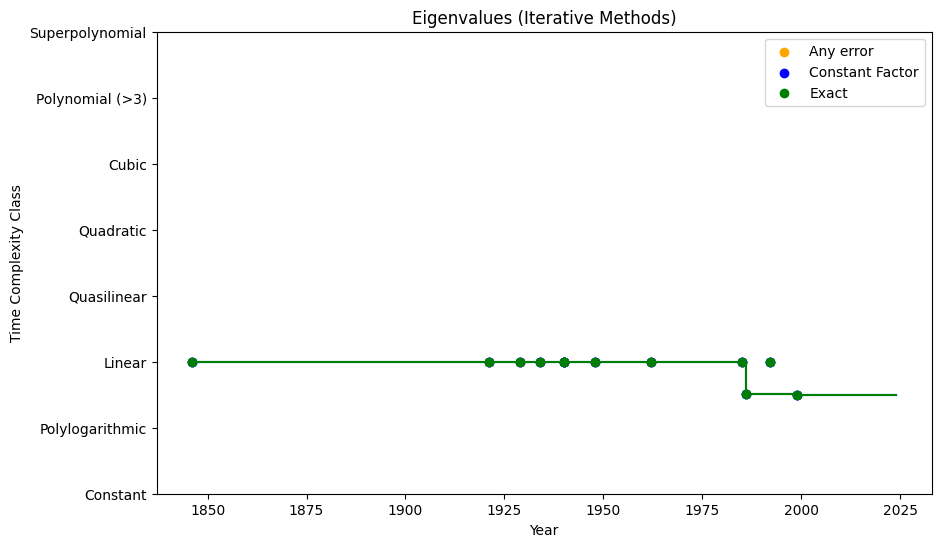

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


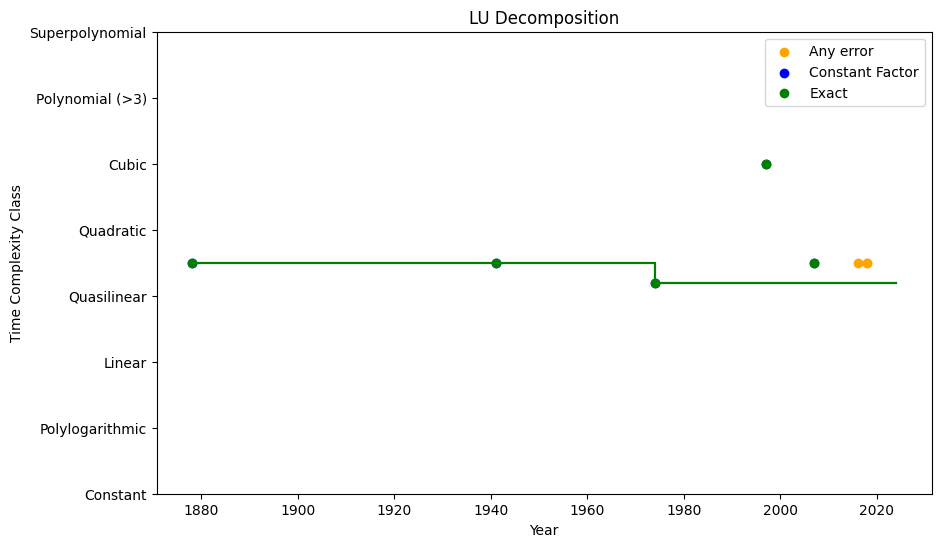

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


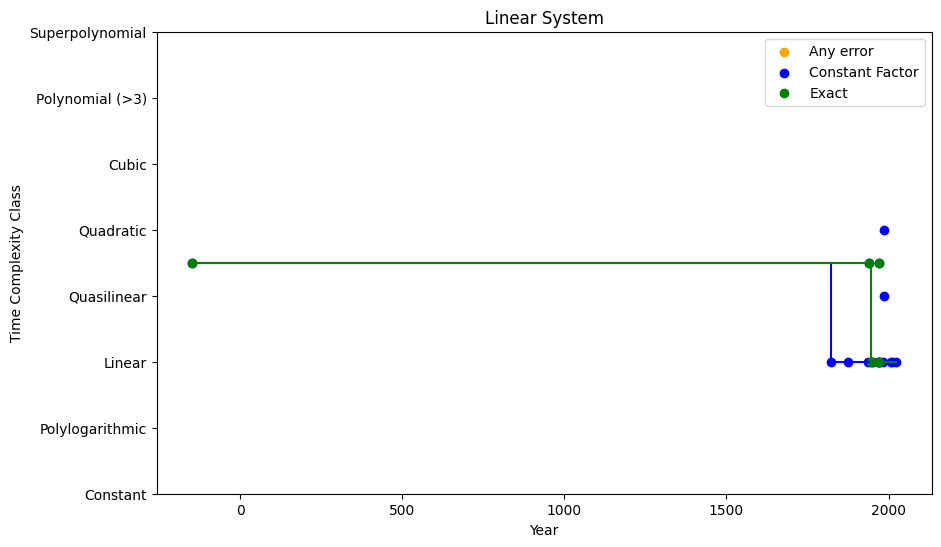

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


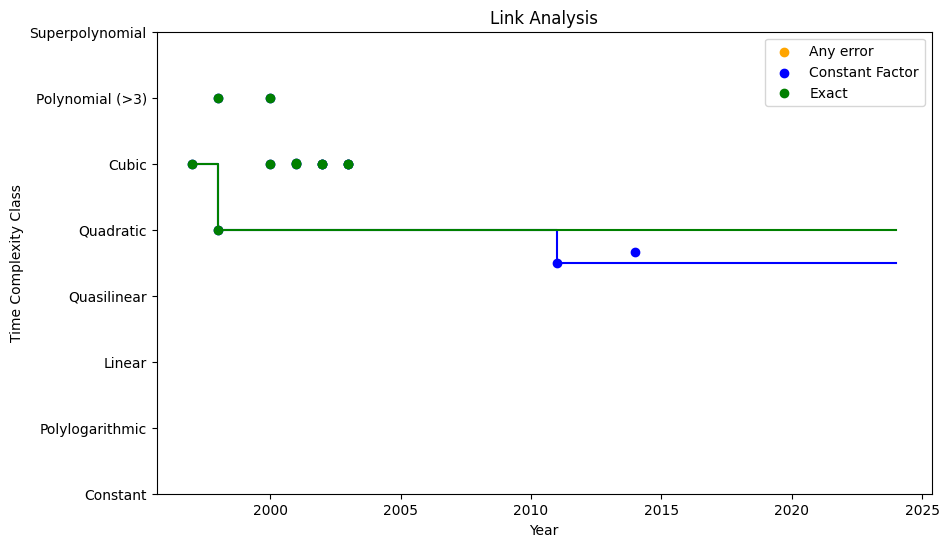

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


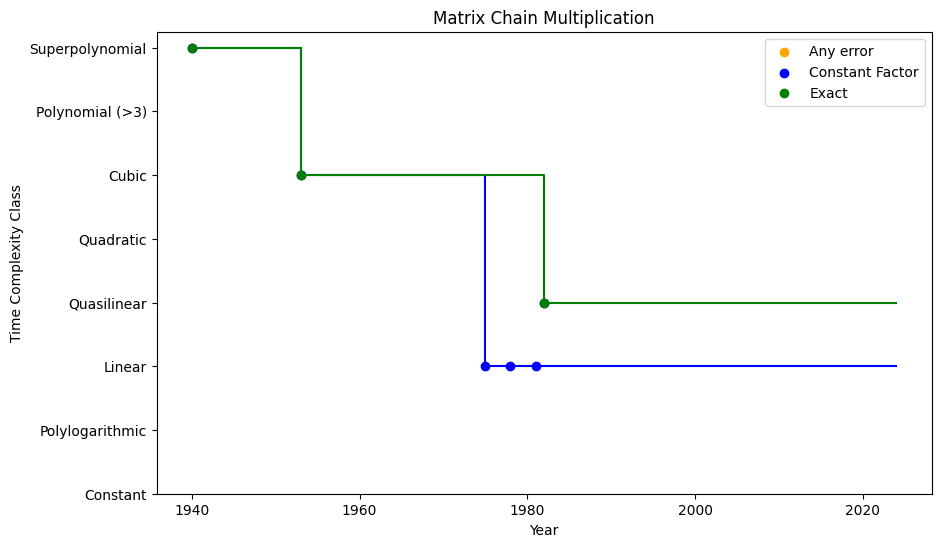

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


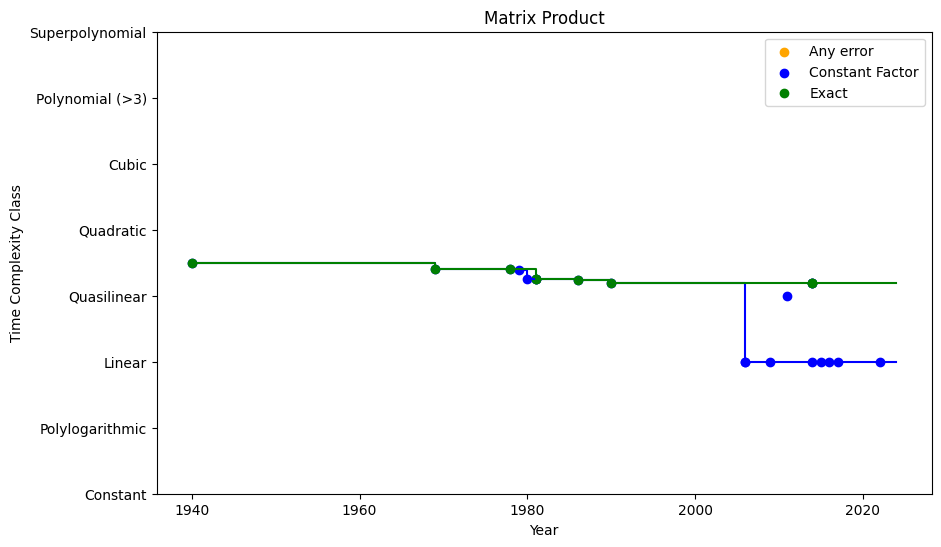

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


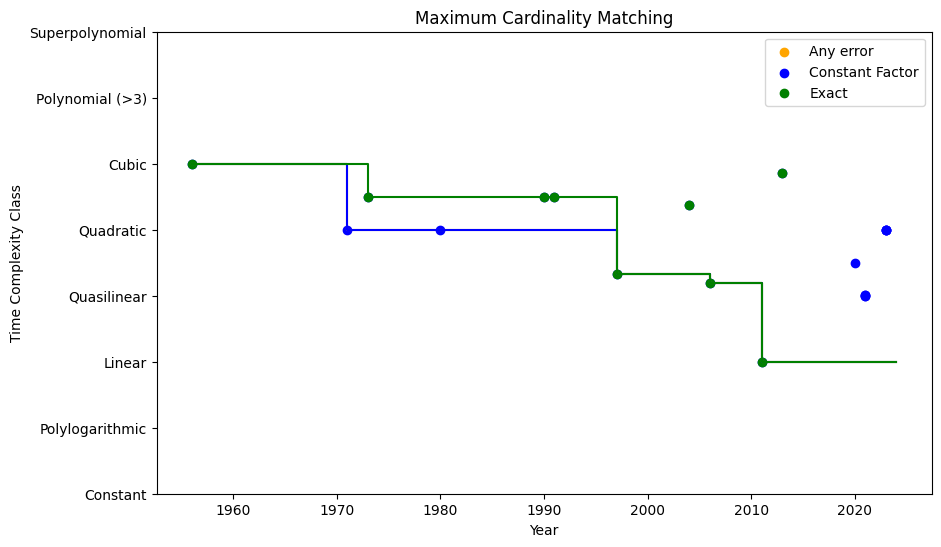

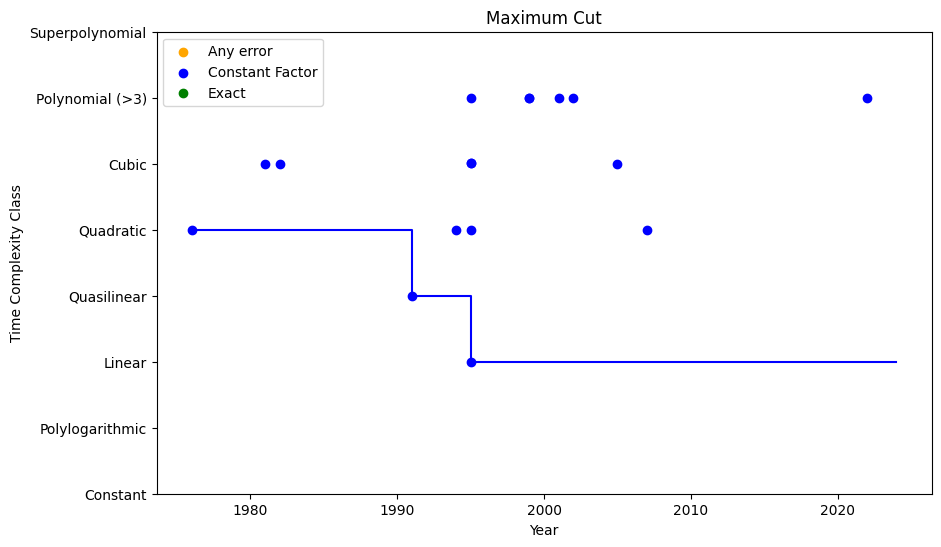

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


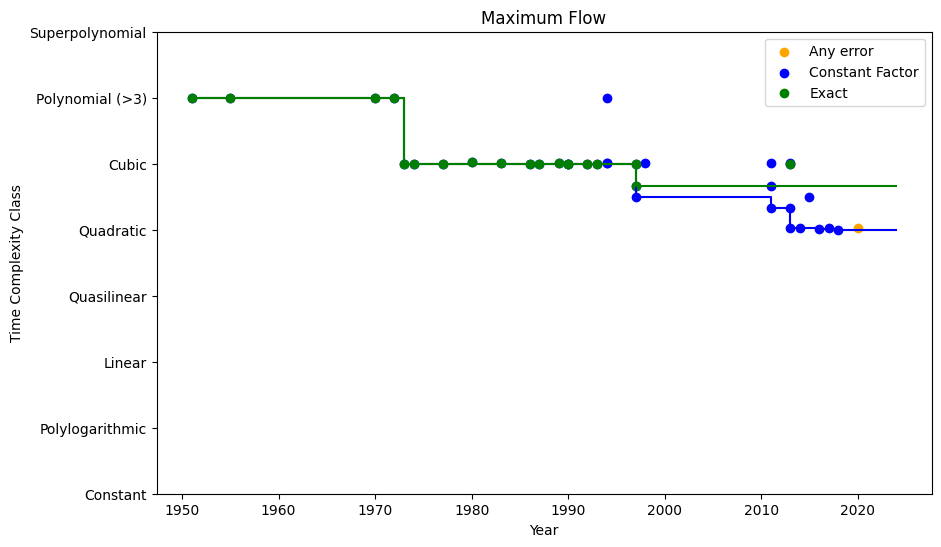

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


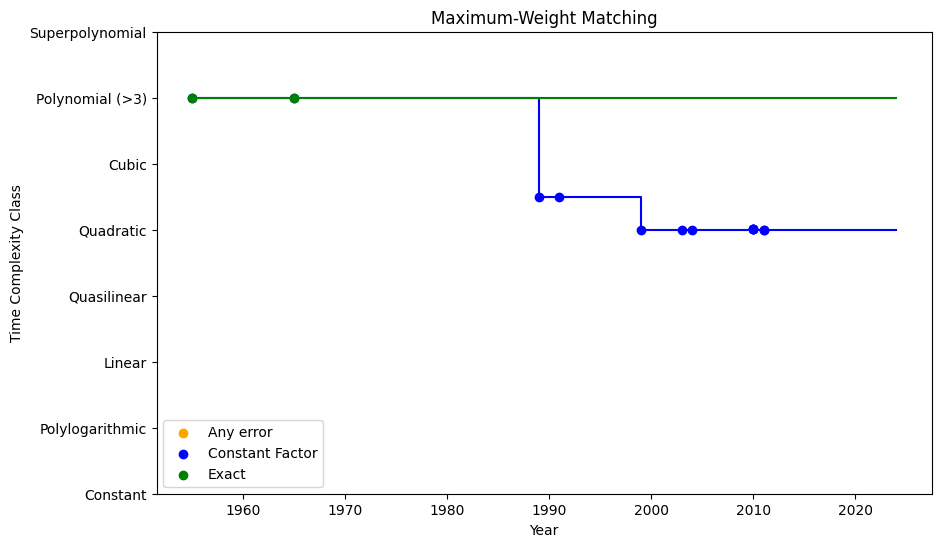

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


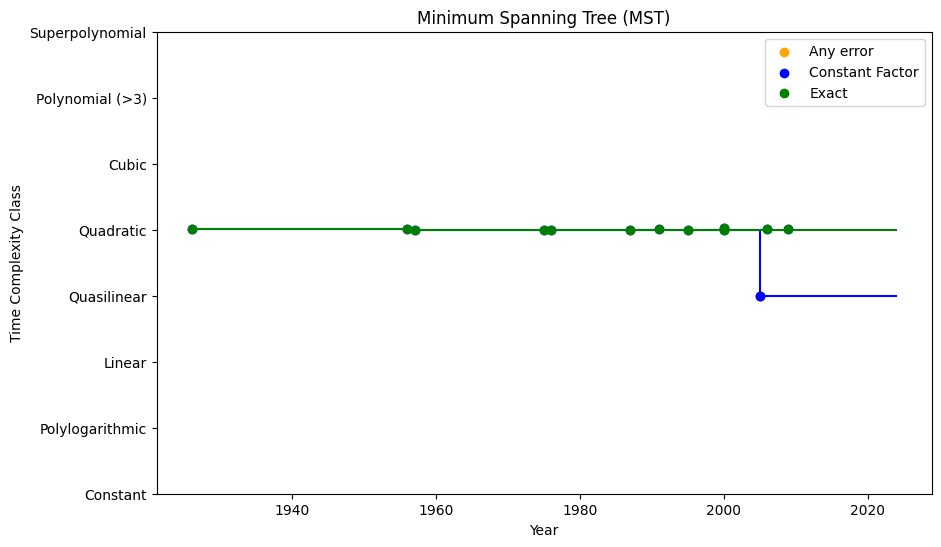

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


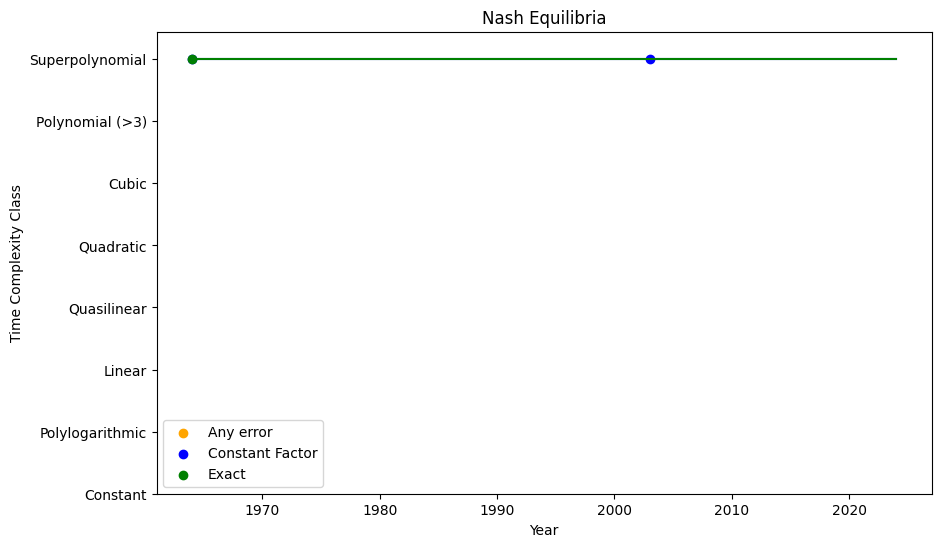

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


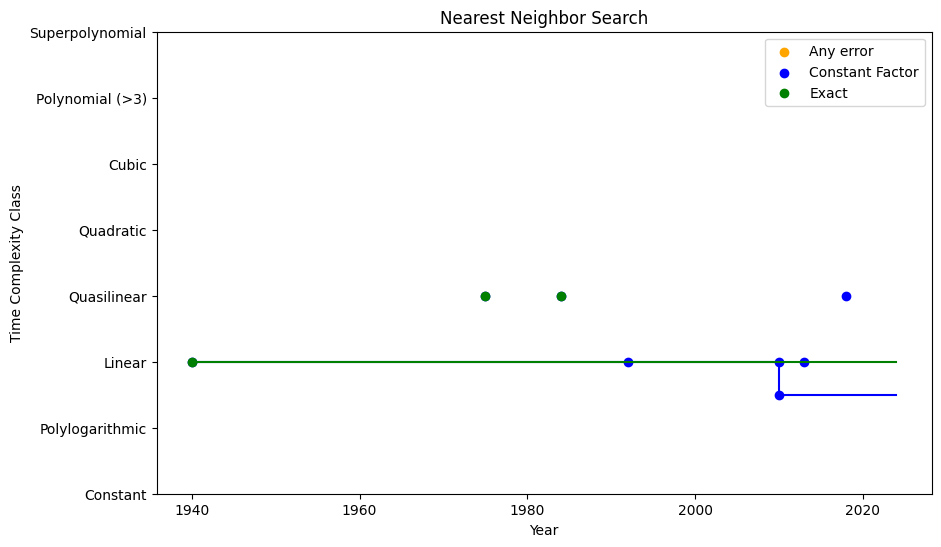

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


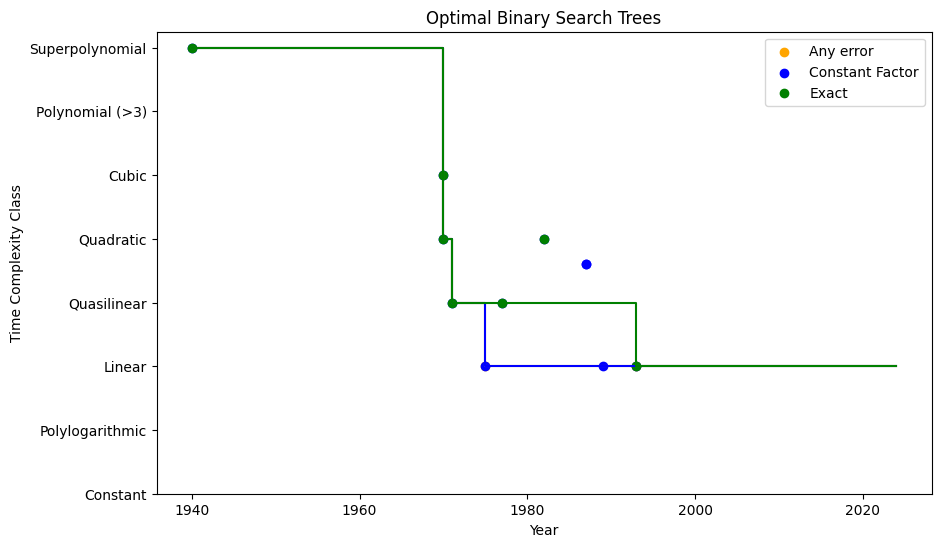

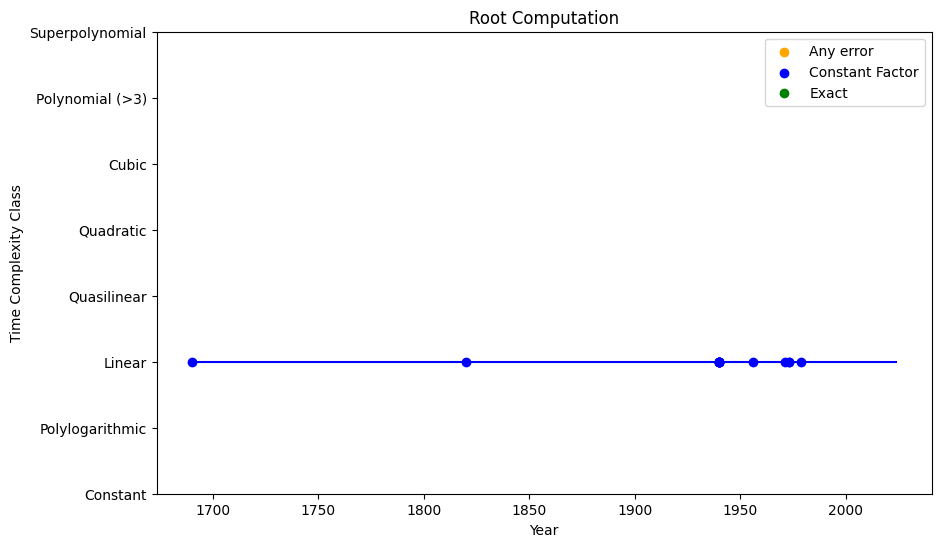

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


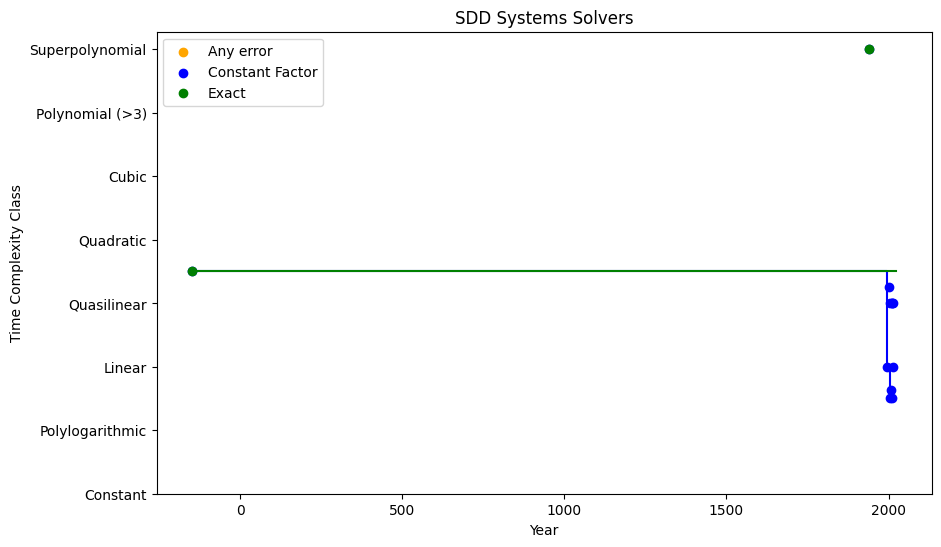

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


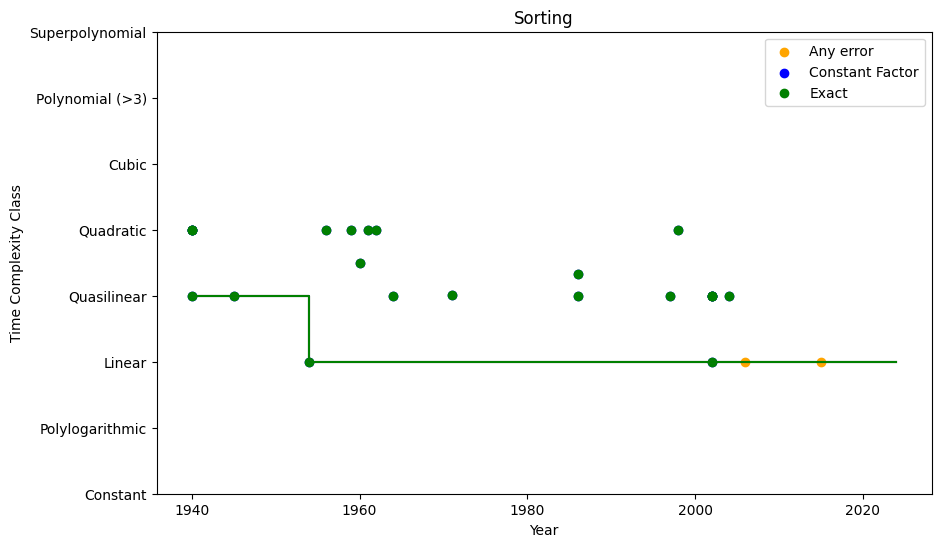

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


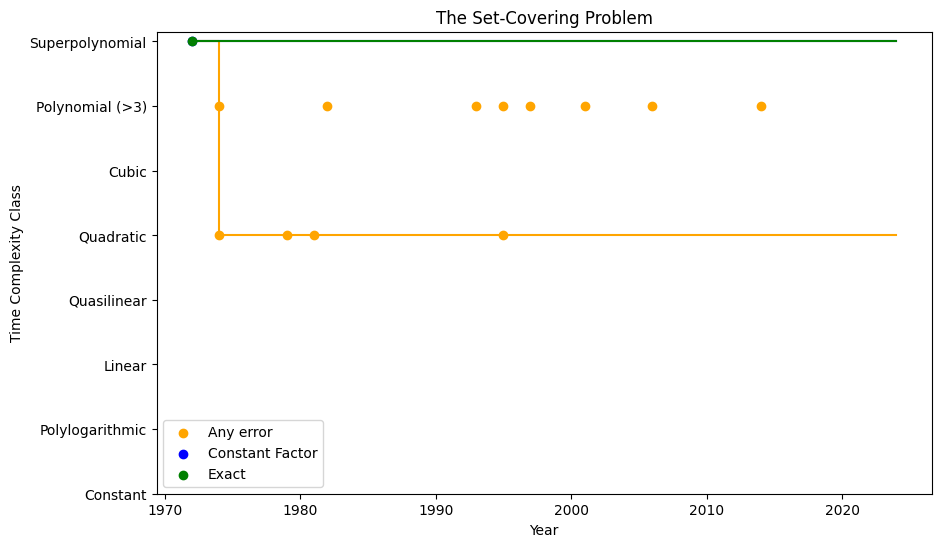

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


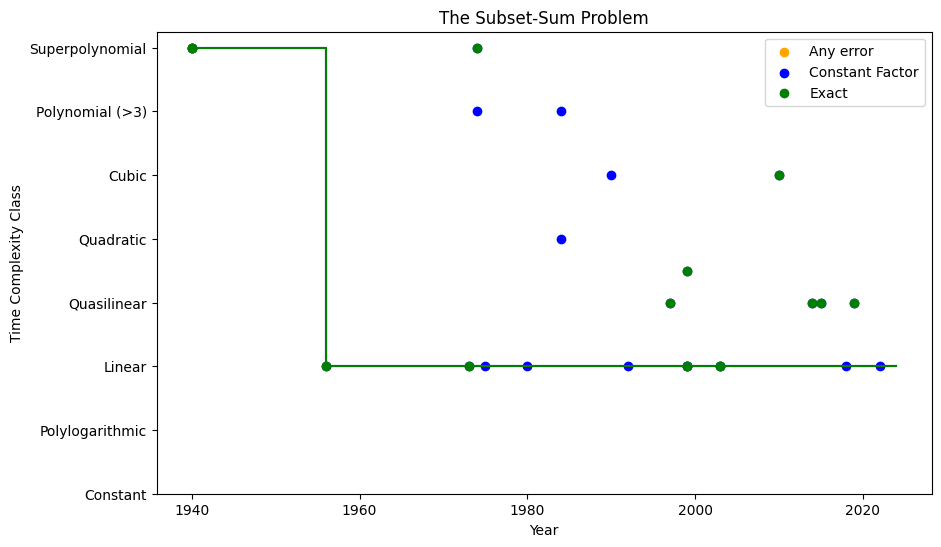

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


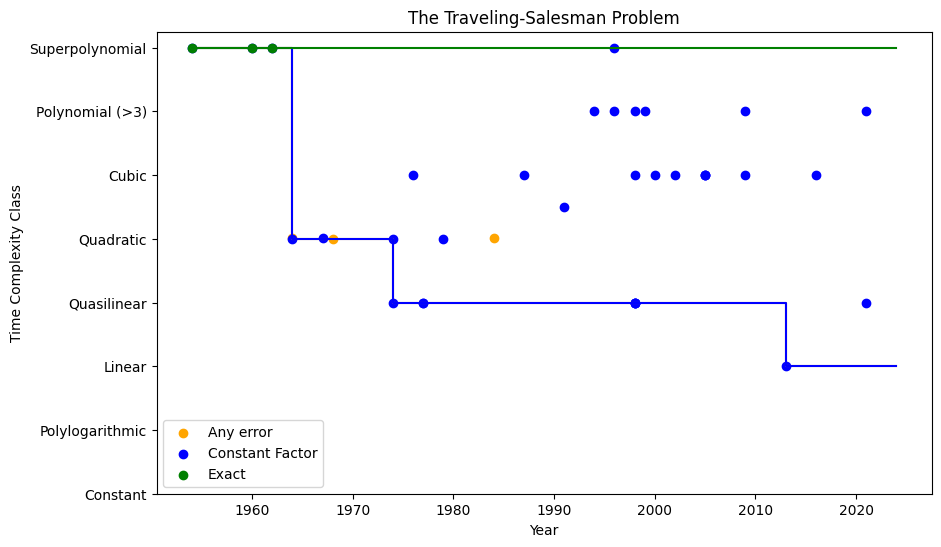

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_3815/1398515150.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


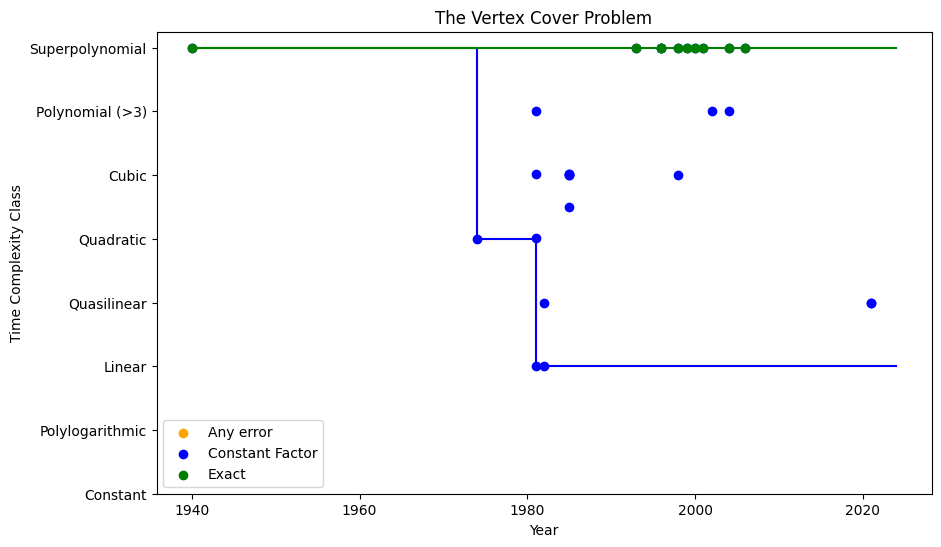

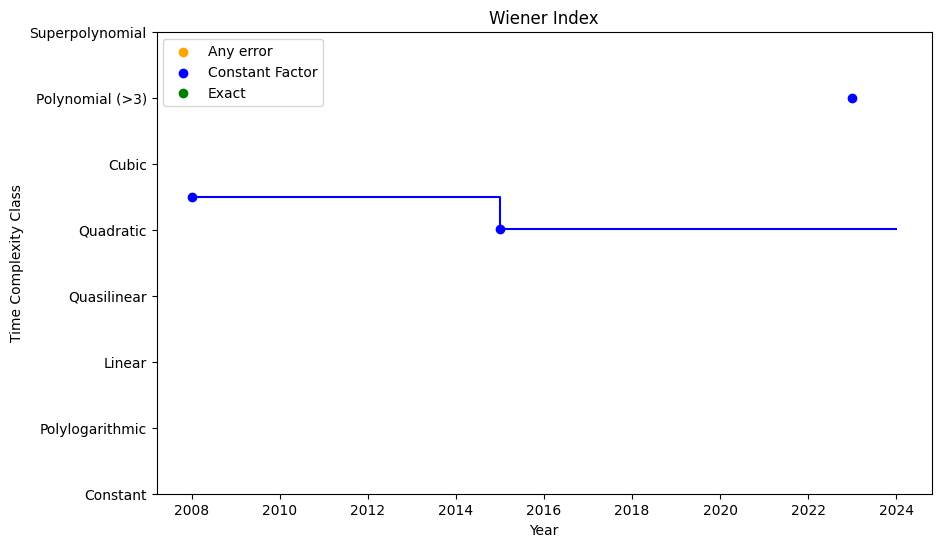

In [38]:
for family in approximation_algorithms['Family Name'].unique():
    plot_family(family)


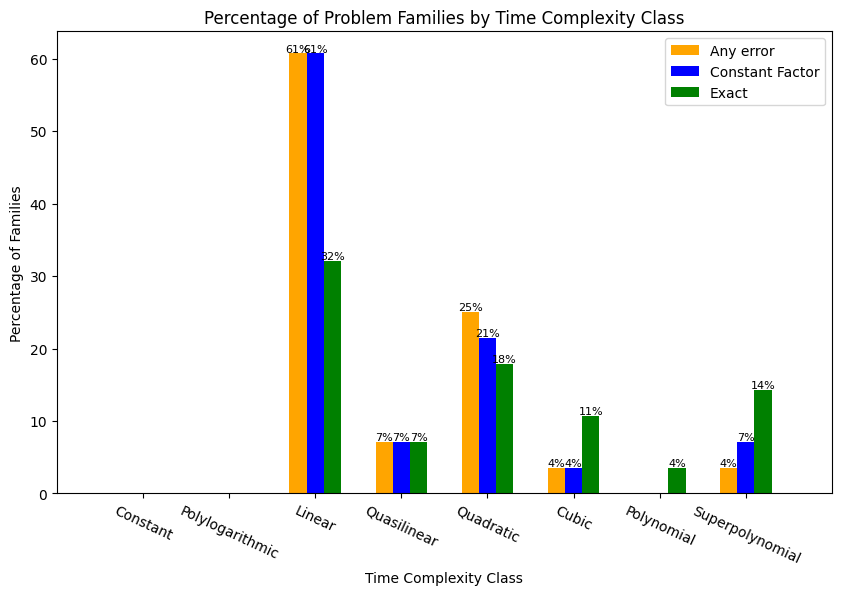

In [39]:
import math
df = pd.concat([approximation_algorithms, sheet1], axis=0)


# print paralel values

# create column exact that is True if the algorithm have no Approximation Type
df['Exact'] = df['Approximation Type (additive/multiplicative)'].isnull()

# create a column Constant Factor that is True if the algorithm have Approximation Factor Class (Mult) <= 2 or Approximation Factor Class (Add) <= 4.5 or is exact
df['Constant Factor'] = (df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | (df['Approximation Factor Class (Add)'].astype(float) <= 2) | df['Exact']
# sort by year and time complexity
df.sort_values(by=['Year', 'Time Complexity Class'], inplace=True)



# split the data in exact, constant factor and approximate
exact = df[df['Exact'] == True]
constant_factor = df[df['Constant Factor'] | df['Exact']]
# approximate = constant factor = False
approximate = df


# min time complexity class for each family
min_exact = exact.groupby('Family Name')['Time Complexity Class'].min()
min_constant_factor = constant_factor.groupby('Family Name')['Time Complexity Class'].min()
min_approximate = approximate.groupby('Family Name')['Time Complexity Class'].min()

# round number
min_exact = min_exact.dropna().map(lambda x:  math.ceil(x))
min_constant_factor = min_constant_factor.dropna().map(lambda x:  math.ceil(x))
min_approximate = min_approximate.dropna().map(lambda x:  math.ceil(x))

# count how many families have each time complexity class
count_exact = min_exact.value_counts()
count_constant_factor = min_constant_factor.value_counts()
count_approximate = min_approximate.value_counts()





# fill missing time complexity classes with 0
for i in range(1, 9):
    if i not in count_exact:
        count_exact[i] = 0
    if i not in count_constant_factor:
        count_constant_factor[i] = 0
    if i not in count_approximate:
        count_approximate[i] = 0

# sort by index
count_exact = count_exact.sort_index()
count_constant_factor = count_constant_factor.sort_index()
count_approximate = count_approximate.sort_index()

# number of unique families in the df
n_families = df['Family Name'].nunique()


# plot as percentage
plt.figure(figsize=(10, 6))
# plot grouped bars
plt.bar(np.arange(1, 9, 1) - 0.2, count_approximate.values / n_families * 100, width=0.2, label='Any error', color='orange')
plt.bar(np.arange(1, 9, 1), count_constant_factor.values / n_families * 100, width=0.2, label='Constant Factor' , color='blue' )
plt.bar(np.arange(1, 9, 1) + 0.2, count_exact.values / n_families * 100, width=0.2, label='Exact', color='green')


plt.xticks(np.arange(1, 9, 1), ['Constant', 'Polylogarithmic', 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial', 'Superpolynomial'])

# increase space between bars

plt.xlabel('Time Complexity Class')
plt.ylabel('Percentage of Families')

# Set the limits to fit the plot as the original
plt.xlim(0, 1+len(['Constant', 'Polylogarithmic', 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial', 'Superpolynomial']))



# Add the percentage on top of each bar and fix the labels

for bar in plt.gca().patches:
    yval = bar.get_height()
    if yval > 0:
        
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.25, f'{yval:.0f}%', ha='center', fontsize=8)


plt.legend()

# rotate x labels
plt.xticks(rotation=-25)

plt.title('Percentage of Problem Families by Time Complexity Class')

plt.show()
